# Round Trip Astrometry Test
The following piece of code performs a test of the internal precision of WCS pixel to sky coordinate conversions. After a few round trips, a surprisingly large error of order a milliarcsecond accumulates.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
from lsst.daf.persistence import Butler
from lsst.afw.geom import Point2D, SpherePoint

In [3]:
butler = Butler('/home/shared/twinkles/output_data_v2')
subset = butler.subset('calexp', filter='r') # Pick a random visit
calexp = butler.get('calexp', **subset.cache[0])

In [4]:
wcs = calexp.getWcs()
n = 11
pixel_array = [Point2D(1000., 1000.)]
sky_array = []
separation_array = np.empty(n)
for ii in range(0, n):
    sky_array.append(wcs.pixelToSky(pixel_array[-1]))
    pixel_array.append(wcs.skyToPixel(sky_array[-1]))
    separation_array[ii] = sky_array[0].separation(sky_array[-1]).asArcseconds()

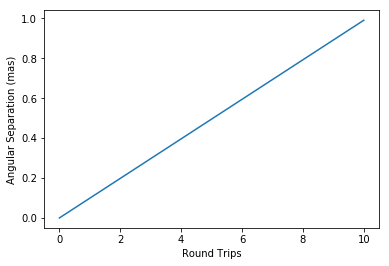

In [5]:
plt.figure()
plt.plot(np.arange(n), 1000. * separation_array)
plt.xlabel('Round Trips')
plt.ylabel('Angular Separation (mas)')